In [1]:
# Import das Bibliotecas:
import numpy
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!

In [2]:
import prism, noise, plot_3D, auxiliars, salve_doc

### Etapa 1: Definicão das coordenadas de Observação:

In [3]:
nx = 100 # n de observacoes na direcao x
ny = 100 # n de observacoes na direcao y
size = (nx, ny)

xmin = -10000.0 # metros
xmax = +10000.0 # metros
ymin = -10000.0 # metros
ymax = +10000.0 # metros
z = -100.0 #altura de voo, (com Z constante) em metros
#zmax    = -100.0 # altura de voo, em metros

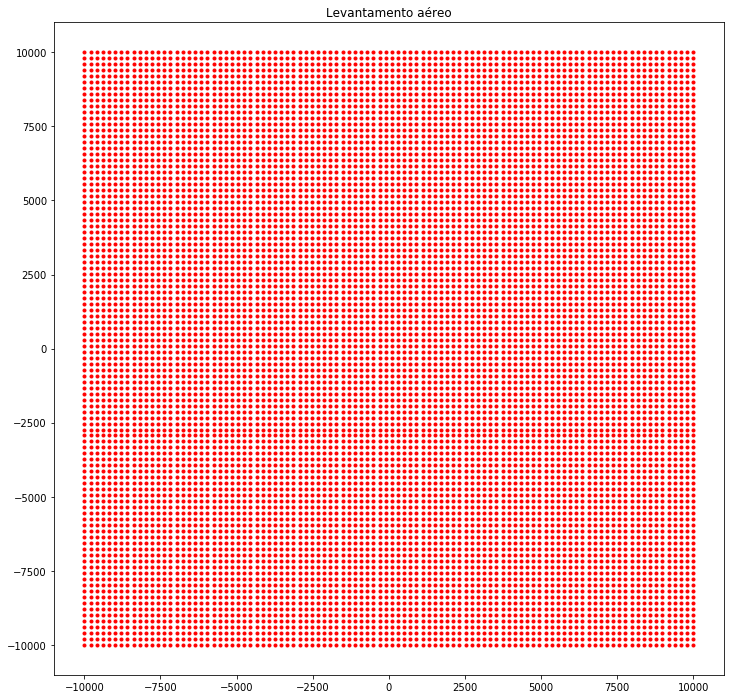

In [4]:
dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(dicionario)

### Etapa 2: Definicão das coordenadas dos prismas modelados:

In [66]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-2000.0, 2000.0) 
y1,y2  = (-3000.0, 3000.0)
z1,z2  = (1500.0,2000.0)   # z eh positivo para baixo!
deltaz = 100.0
deltay = 4000.0
incl = 'positivo'

In [67]:
dic = {'n': 3,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'incl': 'positivo'}

In [68]:
pointx, pointy, pointz = plot_3D.creat_point(dic)
print(pointx)
print(pointy)
print(pointz)

[-2000.0, 2000.0, -2000.0, 2000.0, -2000.0, 2000.0]
[-3000.0, 3000.0, -1000.0, 5000.0, 1000.0, 7000.0]
[1500.0, 2000.0, 1550.0, 2050.0, 1600.0, 2100.0]


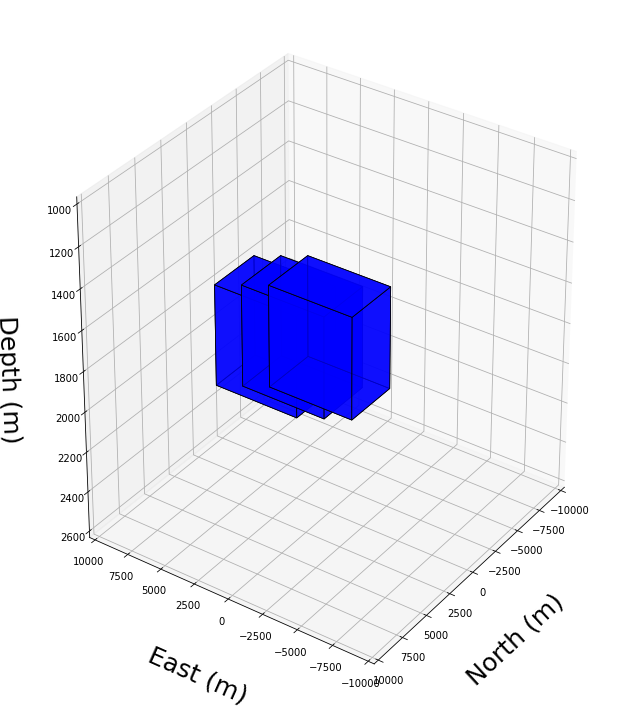

In [69]:
#%matplotlib notebook
dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [210,145]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
#----------------------------------------------------------------------------------------------------#
prisma = {'n': 3,
         'prisma': [prism_1, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma, size, view, x, y, pointz)

### Etapa 3: Simulação do campo Principal na região das observações:

In [70]:
I = -30.0    # inclinacao do campo principal em graus
D = -23.0      # declinacao do campo principal em graus
Fi = 40000.0 # Intensidade do campo principal (nT)

# Campo principal variando com as posicao F(X,Y):
F = Fi + 0.013*X + 0.08*Y # nT

### Etapa 4: Definição das propriedades das fontes crustais (prismas verticas):

In [71]:
# Propriedades magneticas da fonte crustal:
inc = I # magnetizacao puramente induzida
dec = -10.0 
Mi  = 10.0 # intensidade da magnetizacao em A/m
Mi2 = 15.0
Mi3 = 7.0

fonte_crustal_mag1 = [pointx[0], pointx[1], 
                     pointy[0], pointy[1],
                     pointz[0], pointz[1], Mi]

fonte_crustal_mag2 = [pointx[2], pointx[3], 
                     pointy[2], pointy[3],
                     pointz[2], pointz[3], Mi2]

fonte_crustal_mag3 = [pointx[4], pointx[5], 
                     pointy[4], pointy[5],
                     pointz[4], pointz[5], Mi3]


### Etapa 5: Cálculo das anomalias via function (prism_tf)

In [72]:
tfa1 = prism.prism_tf(X, Y,z, fonte_crustal_mag1, I, D, inc, dec)
tfa2 = prism.prism_tf(X, Y,z, fonte_crustal_mag2, I, D, inc, dec)
tfa3 = prism.prism_tf(X, Y,z, fonte_crustal_mag3, I, D, inc, dec)

tfa_final = tfa1 + tfa2 + tfa3

### Etapa 6: Acréscimo de rúido via function (noise_normal_dist)

In [73]:
mi = 0.0
sigma = 0.1

#ACTn = noise.noise_gaussiana(t, mi, sigma, ACT)
tfa_final1 = auxiliars.noise_normal_dist(tfa_final, mi, sigma)


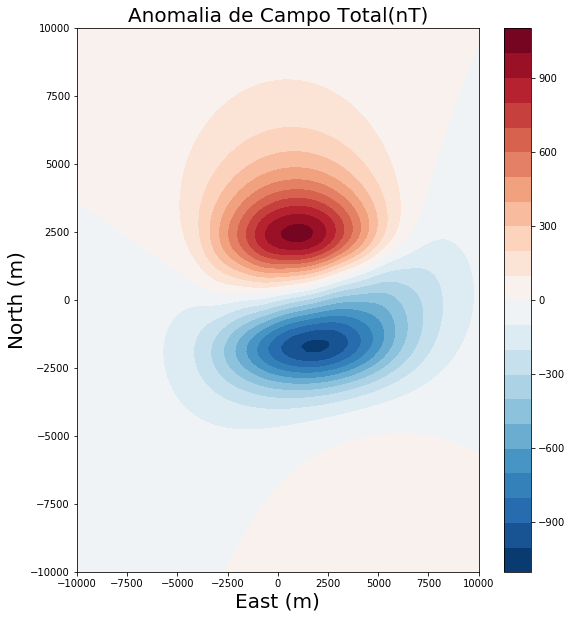

In [74]:
%matplotlib inline
#xs = [x1, x1, x2, x2, x1]
#ys = [y1, y2, y2, y1, y1]

#xs1 = [pointx[0], pointx[0], pointx[5], pointx[5], pointx[0]]

#ys1 = [pointy[0], pointy[5], pointy[5], pointy[0], pointy[0]]

#flechax = [[numpy.absolute(pointx[0] + pointx[5])], [pointx[5]]]
#flechay = [[numpy.absolute(pointy[0] + pointy[5])], [pointy[5]]]


#origin = [[numpy.absolute(pointx[0] + pointx[5])], [[numpy.absolute(pointy[0] + pointy[5])]]]
#ponta = [[pointx[5]], [pointy[5]]]

#print(ponta)

# graficos
plt.close('all')
plt.figure(figsize=(9,10))
#******************************************************
plt.contourf(Y, X, tfa_final1, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
#corpo, = plt.plot(ys1,xs1,'k-*', label = 'Extensão do Dique')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
#arrow = plt.arrow(2000.0, 0.0, 4500.0, 0.0, width=250, length_includes_head = True, color = 'k')
#first_legend = plt.legend(handles=[corpo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, corpo], ['Direção de mergulho', 'Extensão do Dique'], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()


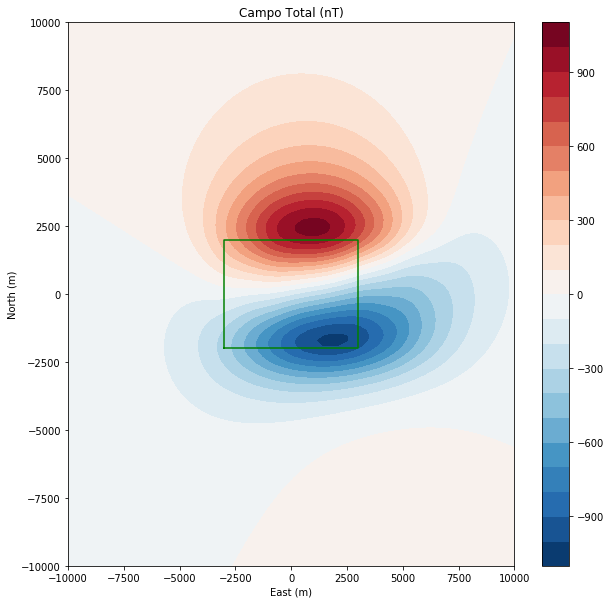

In [75]:
xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
#xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
#xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]

ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
#ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
#ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]

# graficos
plt.close('all')
plt.figure(figsize=(10,10))
#******************************************************
plt.contourf(Y, X, tfa_final, 20, cmap = plt.cm.RdBu_r)
plt.title('Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.plot(ys1,xs1,'g-')
#plt.plot(ys2,xs2,'k-')
#plt.plot(ys3,xs3,'m-')
plt.colorbar()
#plt.savefig('teste_100_40000_D10.png', format='png')
plt.show()

In [76]:
dici1 = {'nx': nx,
         'ny': ny,
         'X': X,
         'Y': Y,
         'Z': Z,
         'ACTn': tfa_final
                  }

data_e_hora_atuais = datetime.now()
data_e_hora = data_e_hora_atuais.strftime('%d_%m_%Y_%H_%M')

dicionario = {'Data da Modelagem': data_e_hora,
              'Tipo de Modelagem': 'Modelagem de prisma',
              'números de corpos': 3,
              'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [pointx[0], pointx[1], pointy[0], pointy[1], pointz[0], pointz[1]],
              'Coordenadas do prisma 2 (x1, x2, y1, y2, z1, z2)': [pointx[2], pointx[3], pointy[2], pointy[3], pointz[2], pointz[3]],
              'Coordenadas do prisma 3 (x1, x2, y1, y2, z1, z2)': [pointx[4], pointx[5], pointy[4], pointy[5], pointz[4], pointz[5]],
              'inclinação': 'positivo',
              'Informação da fonte (Mag, Incl, Decl)': [Mi, inc, dec],
              'Informação regional (Camp.Geomag, Incl, Decl)': [Fi, I, D]}

print(dicionario)

{'Data da Modelagem': '08_07_2020_15_35', 'Tipo de Modelagem': 'Modelagem de prisma', 'números de corpos': 3, 'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [-2000.0, 2000.0, -3000.0, 3000.0, 1500.0, 2000.0], 'Coordenadas do prisma 2 (x1, x2, y1, y2, z1, z2)': [-2000.0, 2000.0, -1000.0, 5000.0, 1550.0, 2050.0], 'Coordenadas do prisma 3 (x1, x2, y1, y2, z1, z2)': [-2000.0, 2000.0, 1000.0, 7000.0, 1600.0, 2100.0], 'inclinação': 'positivo', 'Informação da fonte (Mag, Incl, Decl)': [10.0, -30.0, -10.0], 'Informação regional (Camp.Geomag, Incl, Decl)': [40000.0, -30.0, -23.0]}


In [77]:
Data_f = salve_doc.reshape_matrix(dici1)

In [78]:
Data_f

,North(m),East(m),Altura de voo(m),Anomalia Magnética(nT)
0,-10000.000000,-10000.0,-100.0,-7.710684
1,-9797.979798,-10000.0,-100.0,-8.083538
2,-9595.959596,-10000.0,-100.0,-8.469912
3,-9393.939394,-10000.0,-100.0,-8.869891
4,-9191.919192,-10000.0,-100.0,-9.283504
5,-8989.898990,-10000.0,-100.0,-9.710717
6,-8787.878788,-10000.0,-100.0,-10.151423
7,-8585.858586,-10000.0,-100.0,-10.605436
8,-8383.838384,-10000.0,-100.0,-11.072477
9,-8181.818182,-10000.0,-100.0,-11.552168


In [79]:
#salve_doc.create_diretorio(dicionario, Data_f)